In [100]:
import datetime
import os

import pandas as pd
from matplotlib import pyplot as plt

from analysis_config import (
    BASE_PLOT_DIR,
    TECH_POPULARITY_DIR,
    EXPERIENCE_POPULARITY_DIR,
    EXPERIENCE_REMOTE_DIR,
    IMAGE_FORMAT
)

output_dirs = {
    "tp": BASE_PLOT_DIR + os.sep + TECH_POPULARITY_DIR + os.sep,
    "ep": BASE_PLOT_DIR + os.sep + EXPERIENCE_POPULARITY_DIR + os.sep,
    "re": BASE_PLOT_DIR + os.sep + EXPERIENCE_REMOTE_DIR + os.sep,
}
for key, output_dir in output_dirs.items():
    os.makedirs(output_dir, exist_ok=True)


def save_plot(output_dirs_key, end_dir_name):
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H-%M")
    output_path = os.path.join(output_dirs[output_dirs_key], f"{end_dir_name}_{timestamp}{IMAGE_FORMAT}")
    plt.savefig(output_path, bbox_inches="tight")


df = pd.read_csv("vacancies.csv")

df["required_exp"] = df["required_exp"].replace("5plus", "5+")

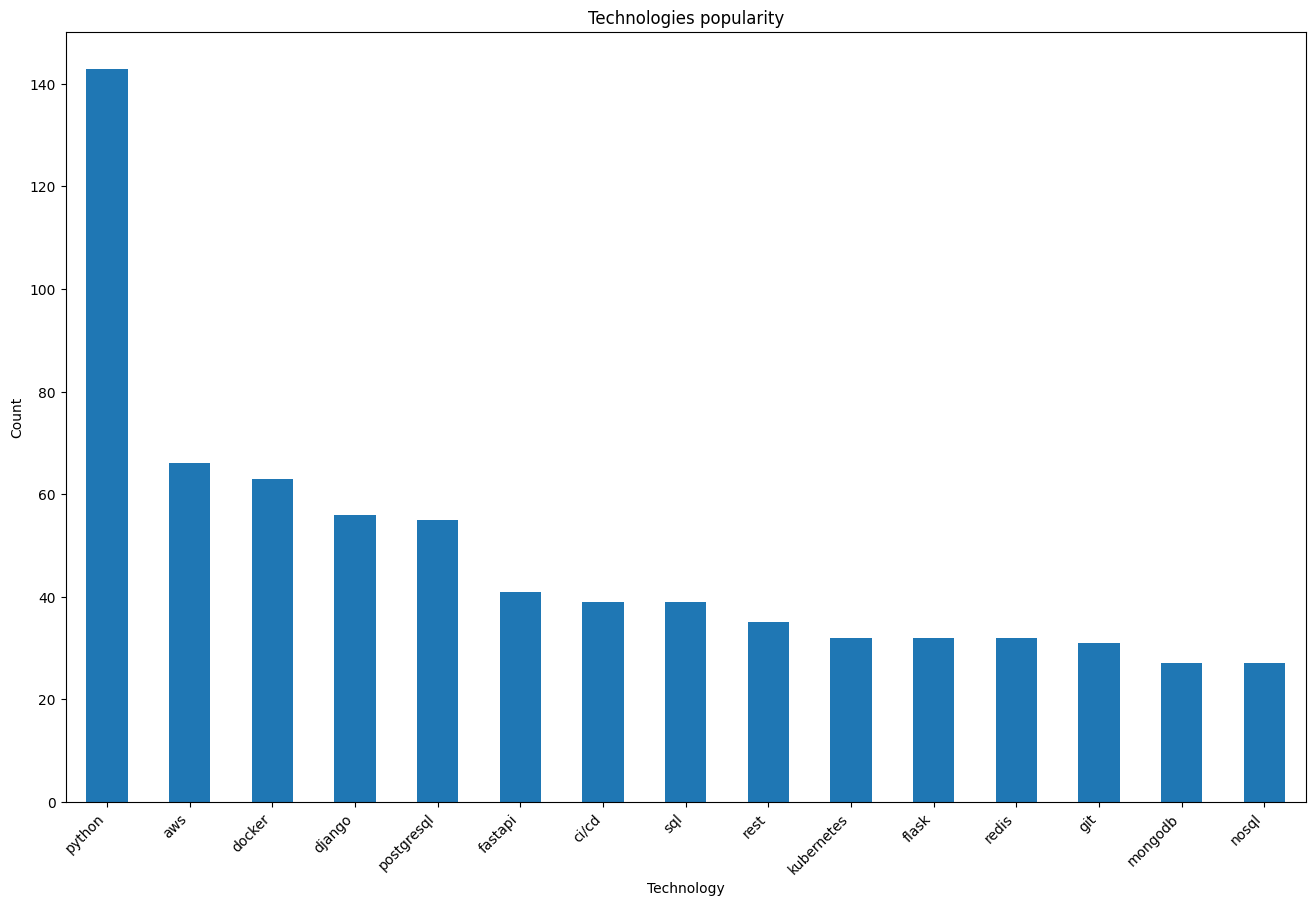

In [101]:
all_technologies = df["technologies"].str.split(",").explode()
tech_count = all_technologies.value_counts().reset_index().head(15)
tech_count.columns = ["technology", "count"]

ax = tech_count.plot(kind="bar", x="technology", y="count", figsize=(16, 10))
ax.set_xlabel("Technology")
ax.set_ylabel("Count")
ax.set_title("Technologies popularity")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.legend().set_visible(False)

save_plot("tp", TECH_POPULARITY_DIR)

plt.show()

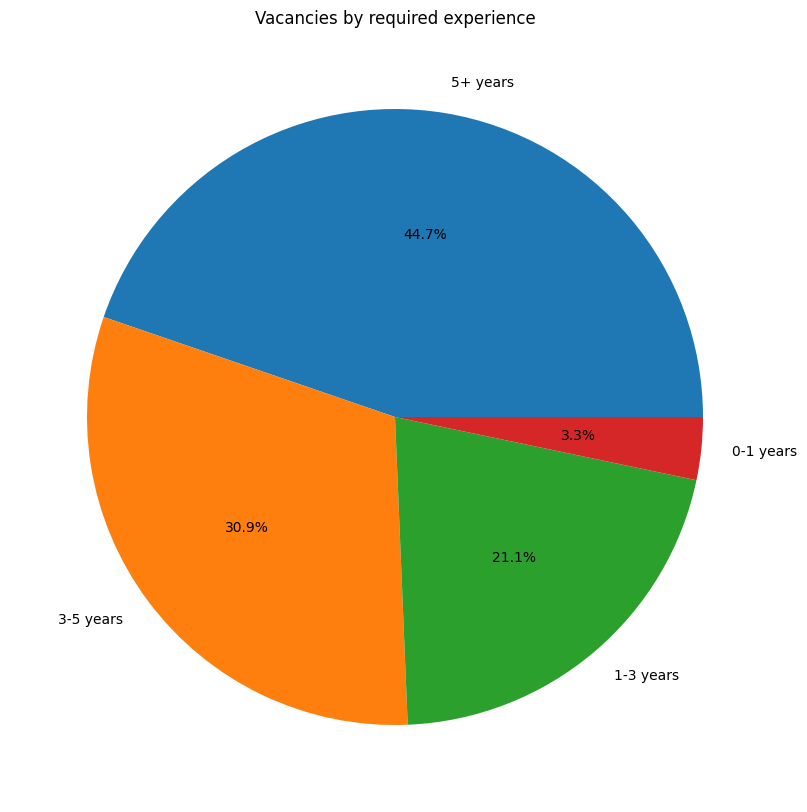

In [102]:
exp_counts = df["required_exp"].value_counts()

fig, ax = plt.subplots(figsize=(16, 10))
ax.pie(exp_counts, labels=exp_counts.index + " years", autopct="%1.1f%%")
ax.set_title("Vacancies by required experience")

save_plot("ep", EXPERIENCE_POPULARITY_DIR)

plt.show()

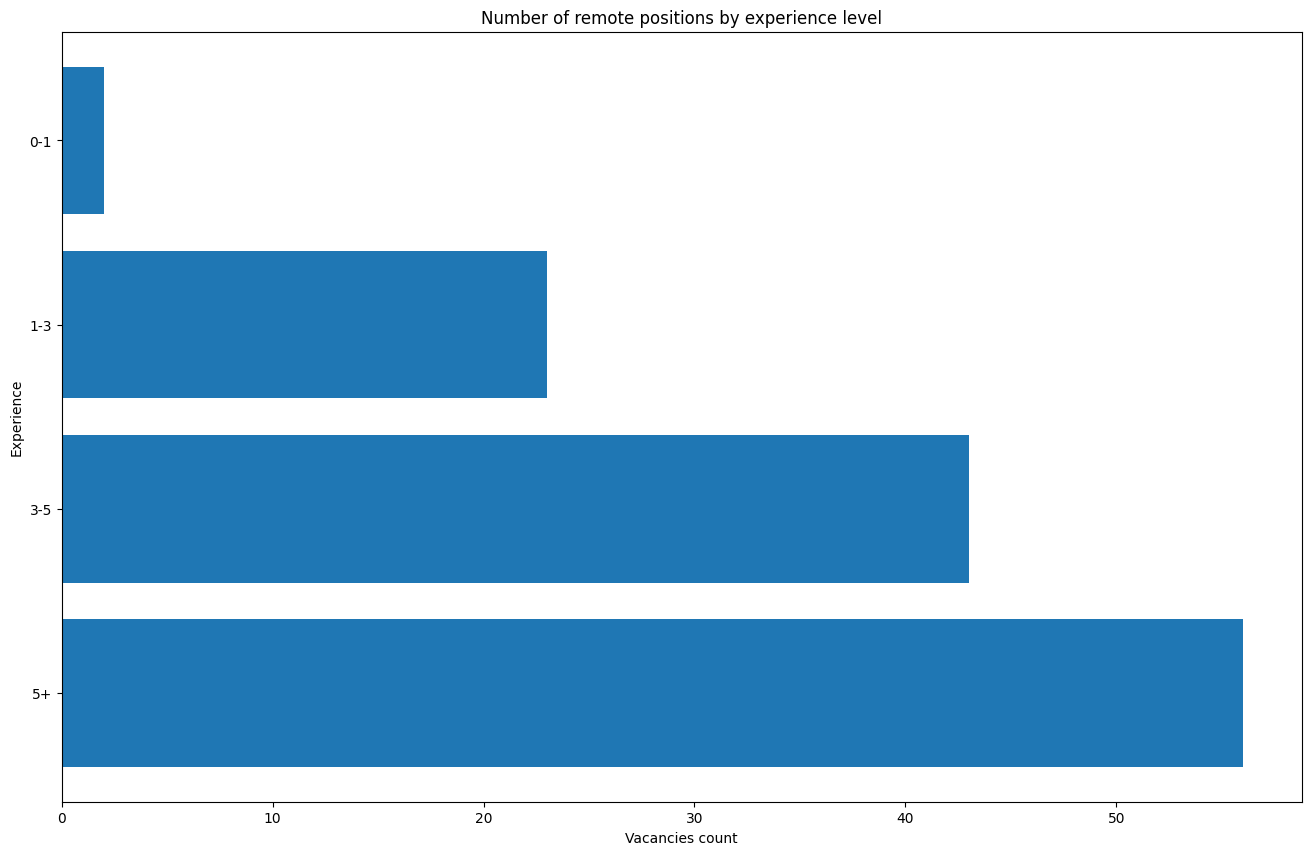

In [103]:
remote_positions = df[df["job_locations"].str.contains("Віддалено")]
experience_counts = remote_positions["required_exp"].value_counts()

plt.figure(figsize=(16, 10))
plt.barh(experience_counts.index, experience_counts.values)
plt.xlabel("Vacancies count")
plt.ylabel("Experience")
plt.title("Number of remote positions by experience level")

save_plot("re", EXPERIENCE_REMOTE_DIR)

plt.show()